In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

## Import DATA

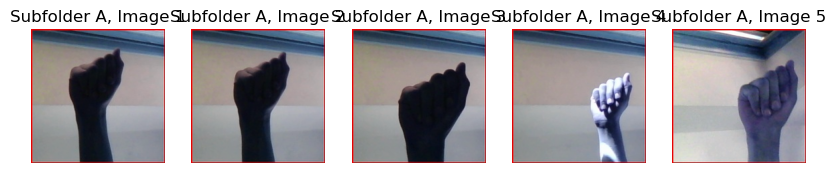

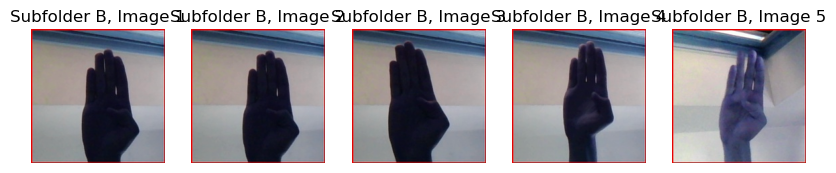

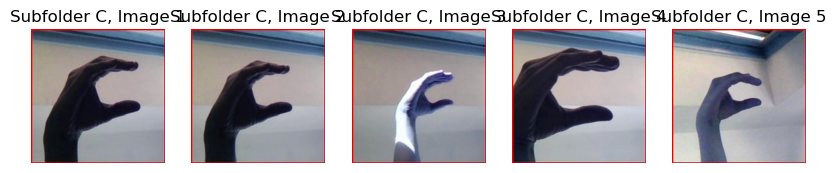

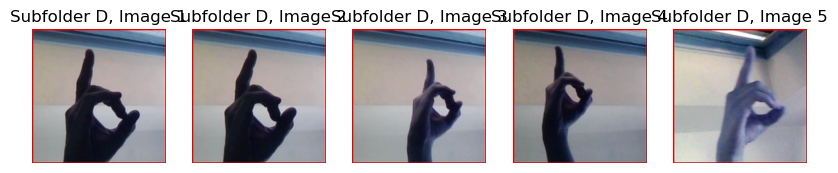

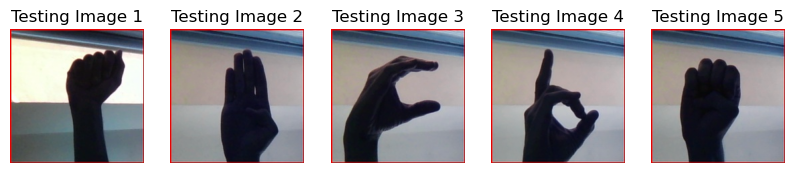

In [35]:
# setting the height and width of the input images
height = 200 
width = 200  

# function to load and preprocess images
def load_and_preprocess_images(directory, label):
    data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Adjust file extension based on your dataset
            path = os.path.join(directory, filename)
            img = cv2.imread(path)
            img = cv2.resize(img, (height, width))
            img = img / 255.0  # Normalize pixel values to be between 0 and 1
            data.append(img)
            labels.append(label)
    return data, labels

# specifying the paths to your training and testing datasets
train_dir = r'C:\Users\nemsa\Desktop\GestoTalk\model\asl_alphabet_train'
test_dir = r'C:\Users\nemsa\Desktop\GestoTalk\model\asl_alphabet_test'

# load and preprocess training data
X_train, y_train = [], []
subfolders = [f.path for f in os.scandir(train_dir) if f.is_dir() and os.path.basename(f).upper() in ['A', 'B', 'C']]

for idx, subfolder in enumerate(subfolders):
    # Getting the label for the subfolder
    label = idx

    # Load and preprocess images from the subfolder
    X_subfolder, y_subfolder = load_and_preprocess_images(subfolder, label)
    X_train.extend(X_subfolder)
    y_train.extend(y_subfolder)

# convert lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# load and preprocess testing data 
X_test, y_test = load_and_preprocess_images(test_dir, label=0)
X_test, y_test = np.array(X_test), np.array(y_test)

# list of subfolders in the training directory
subfolders = [f.path for f in os.scandir(train_dir) if f.is_dir()]
subfolders = [f.path for f in os.scandir(train_dir) if f.is_dir() and os.path.basename(f).upper() in ['A', 'B', 'C','D']]

# Visualize the first 5 images from each subfolder
for subfolder in subfolders:
    # get the label for the subfolder 
    label = os.path.basename(subfolder)

    # load and preprocess images from the subfolder
    X_subfolder, _ = load_and_preprocess_images(subfolder, label)

    # visualize the first 5 images from the subfolder 
    num_images_to_visualize = min(5, len(X_subfolder))

    plt.figure(figsize=(10, 5))
    for i in range(num_images_to_visualize):
        plt.subplot(1, num_images_to_visualize, i + 1)
        plt.imshow(X_subfolder[i])
        plt.title(f'Subfolder {label}, Image {i + 1}')
        plt.axis('off')
    plt.show()

# visualize the first 5 images from the testing dataset
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'Testing Image {i+1}')
    plt.axis('off')
plt.show()


In [34]:
subfolders = [f.path for f in os.scandir(train_dir) if f.is_dir()]

# Count the total number of classes
total_classes = len(subfolders)
print(f"Total Number of Classes: {total_classes}")

# Count the number of images in each class
for subfolder in subfolders:
    class_name = os.path.basename(subfolder)
    num_images = len([f for f in os.listdir(subfolder) if f.endswith('.jpg')])
    print(f"Class {class_name}: {num_images} images")

Total Number of Classes: 29
Class A: 3000 images
Class B: 3000 images
Class C: 3000 images
Class D: 3000 images
Class del: 3000 images
Class E: 3000 images
Class F: 3000 images
Class G: 3000 images
Class H: 3000 images
Class I: 3000 images
Class J: 3000 images
Class K: 3000 images
Class L: 3000 images
Class M: 3000 images
Class N: 3000 images
Class nothing: 3000 images
Class O: 3000 images
Class P: 3000 images
Class Q: 3000 images
Class R: 3000 images
Class S: 3000 images
Class space: 3000 images
Class T: 3000 images
Class U: 3000 images
Class V: 3000 images
Class W: 3000 images
Class X: 3000 images
Class Y: 3000 images
Class Z: 3000 images


## Model

In [25]:
np.random.seed(42)

# faster R-CNN model
def faster_rcnn_model(num_classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(height, width, 3))

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# number of classes in the dataset
num_classes = 29

faster_rcnn_model = faster_rcnn_model(num_classes)
faster_rcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 128

# create data generators for training and testing
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(X_test, y_test, batch_size=batch_size)

# training the model
history = faster_rcnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

final_accuracy = history.history['accuracy'][-1]
print(f"Final Accuracy: {final_accuracy}")

Epoch 1/50
282/282 [==============================] - 315s 837ms/step - loss: 0.8566 - accuracy: 0.5813 - val_loss: 1.3313 - val_accuracy: 0.1071
Epoch 2/50
282/282 [==============================] - 212s 752ms/step - loss: 0.6038 - accuracy: 0.7143 - val_loss: 2.2339 - val_accuracy: 0.0357
Epoch 3/50
282/282 [==============================] - 211s 747ms/step - loss: 0.5445 - accuracy: 0.7493 - val_loss: 0.5695 - val_accuracy: 0.8929
Epoch 4/50
282/282 [==============================] - 210s 746ms/step - loss: 0.4758 - accuracy: 0.7836 - val_loss: 1.6007 - val_accuracy: 0.2500
Epoch 5/50
282/282 [==============================] - 211s 748ms/step - loss: 0.4447 - accuracy: 0.7984 - val_loss: 1.1449 - val_accuracy: 0.5714
Epoch 6/50
282/282 [==============================] - 221s 782ms/step - loss: 0.4042 - accuracy: 0.8262 - val_loss: 1.2980 - val_accuracy: 0.5714
Epoch 7/50
282/282 [==============================] - 223s 790ms/step - loss: 0.3714 - accuracy: 0.8434 - val_loss: 1.2005 -

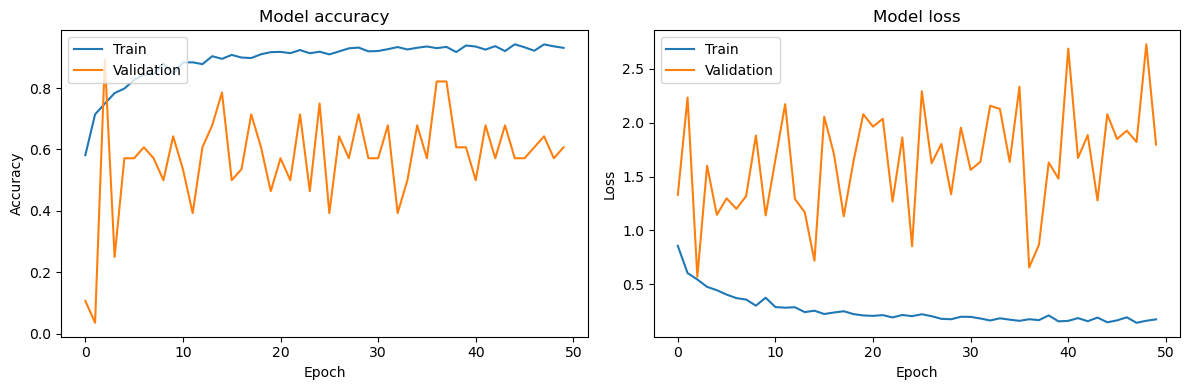

In [29]:
# plotting training history
plt.figure(figsize=(12, 4))

# plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# ploting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [27]:
# Save the trained model
faster_rcnn_model.save('faster_rcnn_model.h5')

D:\Work\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
# load the model
loaded_model = load_model('faster_rcnn_model.h5')

# mapping class indices to alphabet letters
class_to_alphabet = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
                    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
                    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27 : 'nothing', 28 : 'space' }

img_path = r'C:\Users\nemsa\Desktop\GestoTalk\model\new_test\d.png'
img = image.load_img(img_path, target_size=(height, width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# make predictions
predictions = loaded_model.predict(img_array)
decoded_predictions = np.argmax(predictions, axis=1)

# decode the predictions to get class labels
predicted_class = np.argmax(predictions)
predicted_alphabet = class_to_alphabet.get(predicted_class, 'Unknown')

print(f"Predicted Alphabet: {predicted_alphabet}")

1/1 [==============================] - 5s 5s/step
Predicted Alphabet: B
